In [1]:
"""
문제 2. Linear Regression을 이용하여 Boston 집값을 예측하시오.
1. house_price.csv를 이용하여 학습을 한다.
2. 학습용 데이터와 평가용 데이터를 구분한다.
3. 필요한 데이터와 불필요한 데이터를 자체적으로 판단하여 추가 제거하여 학습시킨다.
4. np.random.seed(0)으로 설정한다.
5. Score결과가 0.8이상 나오도록 조정한다.
"""

# 모듈 import
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터 불러오기
data = pd.read_csv('../data/boston_house/house_price.csv')

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [3]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT.MEDV'],
      dtype='object')

In [4]:
data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT.MEDV  
0       15.3  396.90   4.98  24.0         0  

In [5]:
# 데이터 크기 확인
data.shape

(506, 15)

In [6]:
# 데이터 타입 확인
data.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS          int64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX           int64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
CAT.MEDV      int64
dtype: object

In [7]:
data.nunique()

CRIM        504
ZN           26
INDUS        76
CHAS          2
NOX          81
RM          446
AGE         356
DIS         412
RAD           9
TAX          66
PTRATIO      46
B           357
LSTAT       455
MEDV        229
CAT.MEDV      2
dtype: int64

In [8]:
# 빈값 확인
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
CAT.MEDV    0
dtype: int64

In [9]:
# 빈값이 존재할 때 행 확인
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV


In [10]:
# 자료 통계 확인
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [11]:
# 데이터 연관성 확인
corr = data.corr()
corr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [12]:
corr.shape

(15, 15)

<Axes: >

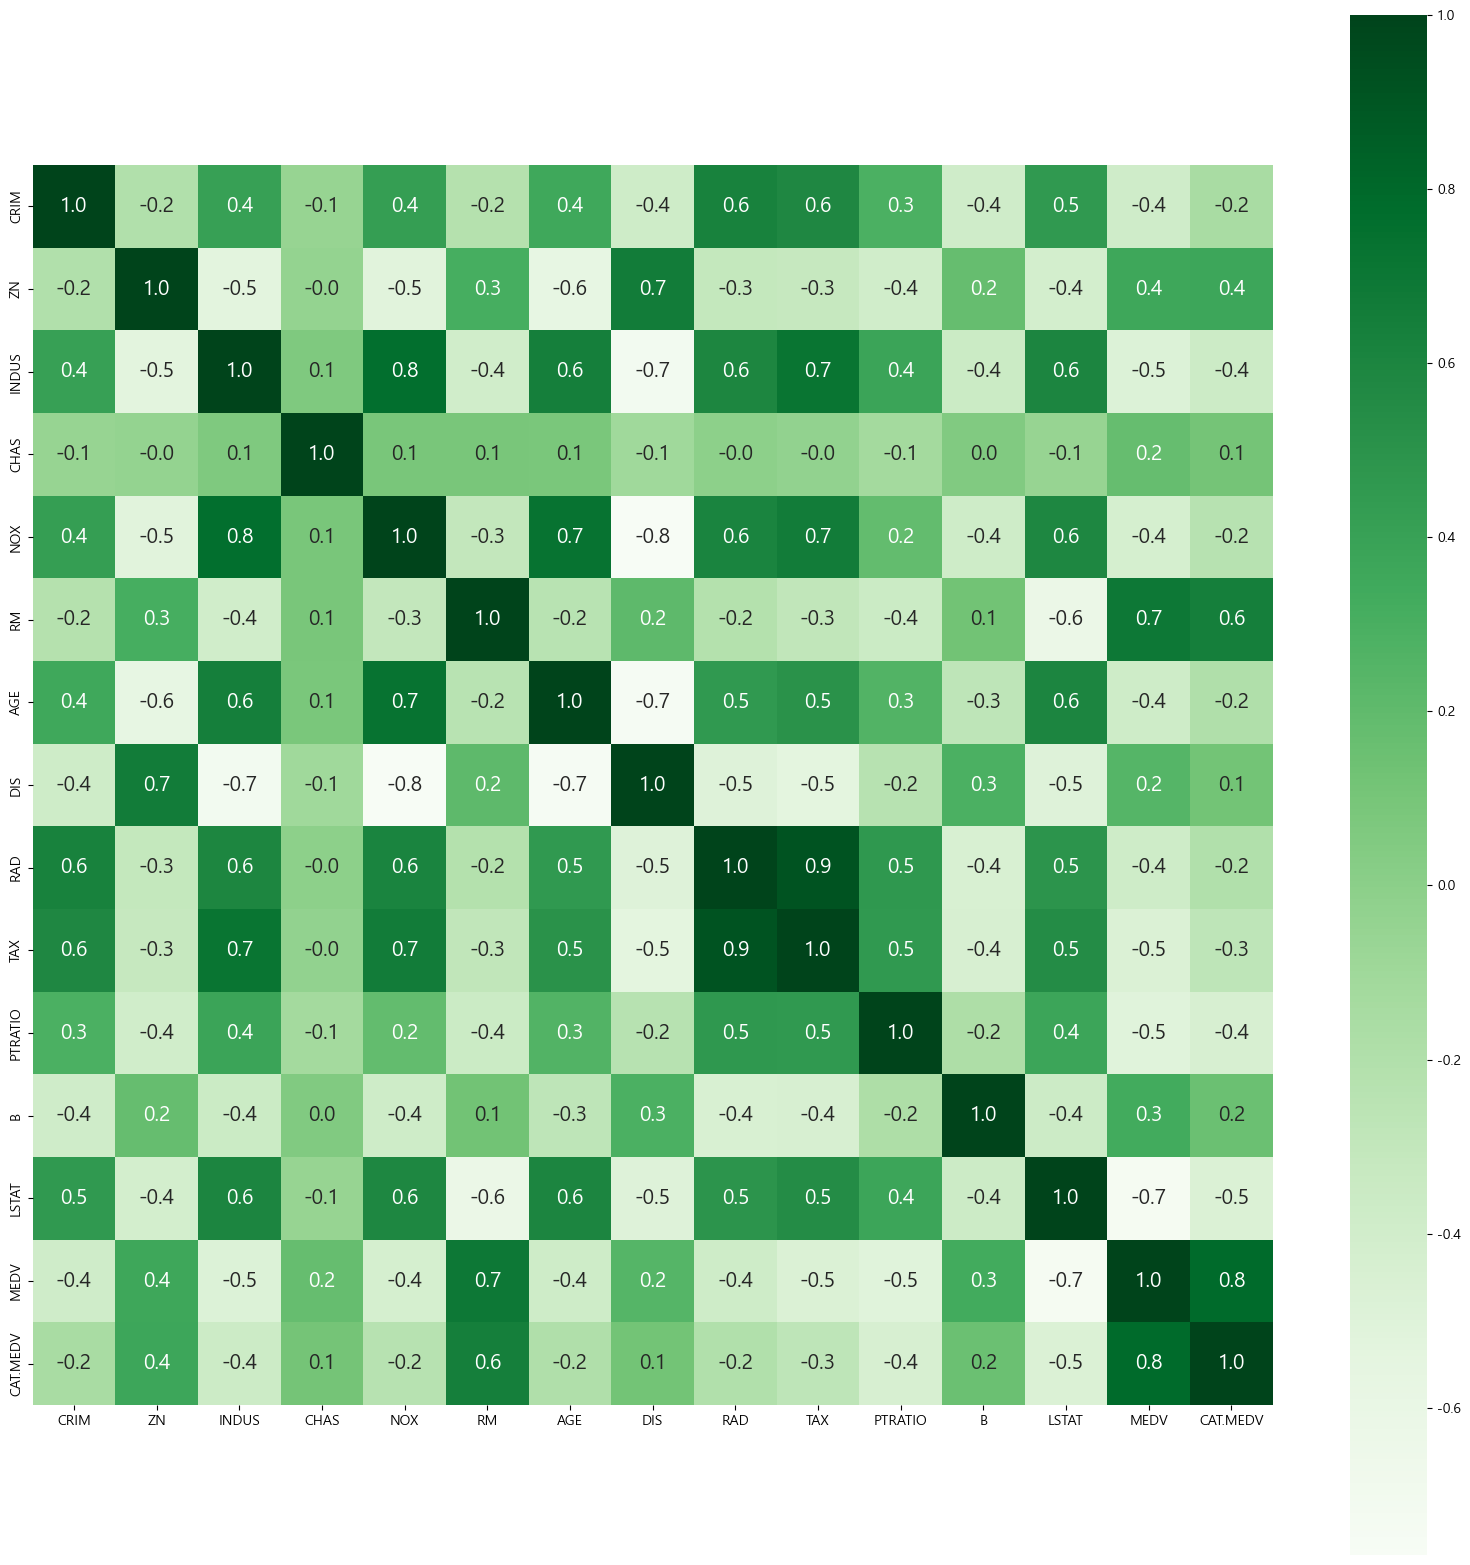

In [13]:
# 데이터 연관성에 대해 표 그리기 
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [14]:
# 데이터 분리
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [15]:
# 트레이닝 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [16]:
# 선형회귀분석
# 모델 트레이닝 시키기

# 선형회귀모델 임포트
from sklearn.linear_model import LinearRegression

# 선형회귀모델 변수 생성
lm = LinearRegression()

# 트레이닝 데이터를 사용하도록 하기
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
# y 절편의 값
lm.intercept_

38.044841671023704

In [18]:
# 데이터프레임 계수 값 변환시키기
'''
X_train.columns: X_train이라는 DataFrame의 열 이름들을 가져옵니다. 이 열 이름들은 훈련 데이터의 특성들을 나타냅니다.
lm.coef_: lm은 학습된 선형 회귀 모델을 나타냅니다. coef_ 속성은 선형 회귀 모델의 계수를 나타내며, 각 특성에 대한 계수 값을 배열로 반환합니다.
pd.DataFrame([X_train.columns, lm.coef_]): 위 두 정보(특성 이름과 그에 해당하는 계수)를 사용하여 DataFrame을 생성합니다. 이 때, 각 특성의 이름과 그에 대응하는 계수가 같은 행에 위치하도록 .T (전치)를 사용하여 DataFrame의 행과 열을 바꿉니다.
'''
coeffcients = pd.DataFrame([X_train.columns, lm.coef_]).T 

'''
rename(columns={0:'Attribute', 1: 'Coefficients'}): 
이 코드는 생성된 DataFrame의 열 이름을 바꾸는 역할을 합니다. 
원래 0으로 라벨링된 열을 'Attribute'로, 1로 라벨링된 열을 'Coefficients'로 이름을 변경합니다. 
결론적으로, 첫 번째 열은 각 특성의 이름을 나타내고, 
두 번째 열은 그 특성에 대한 계수 값을 나타냅니다.
'''
coeffcients = coeffcients.rename(columns={0:'Attribute', 1: 'Coefficients'})

# 최종적으로 생성된 데이터프레임 생성
coeffcients

,Attribute,Coefficients
0,CRIM,-0.128548
1,ZN,0.000574
2,INDUS,0.097921
3,CHAS,3.830096
4,NOX,-10.702881
5,RM,0.759722
6,AGE,-0.012305
7,DIS,-0.740307
8,RAD,0.203898
9,TAX,-0.009306


In [19]:
# 모델 평가
# 학습된 데이터로 모델 예측하기
y_pred = lm.predict(X_train)

In [20]:
# 모델 평가
'''
R^2: X와 Y의 선형 관계를 측정하는 지표. 실제 값의 분산 대비 예측값의 분산 비율을 의미함. 1에 가까울 수록 좋다.(상대적인 성능을 나타내기 쉬움)
조정된 R^2: 조정된  R-제곱은 예측 변수의 수가 다른 회귀 모델의 설명력을 비교
MAE: 평균 절대 오차(MAE) - 오차의 절대값의 평균. 두 연속 변수 사이의 차이, 여기서는 y의 실제 값과 예측값을 측정함
MSE: 평균 제곱 오차(MSE)는 MAE와 유사하지만, 차이를 제곱한 후 모두 더하는 방식
RMSE: 평균 제곱근 오차(RMSE)는 평균 제곱 오차(MSE)를 기반으로 하며, 오차의 제곱과 평균을 구한 후 그 결과값의 제곱을 취한다.

'''

print('R^2:', metrics.r2_score(y_train, y_pred))
print('조정된 R^2: ',1-(1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8463313614053305
조정된 R^2:  0.8399851639412439
MAE: 2.4363089772996855
MSE: 11.56676592014499
RMSE: 3.400994842710731


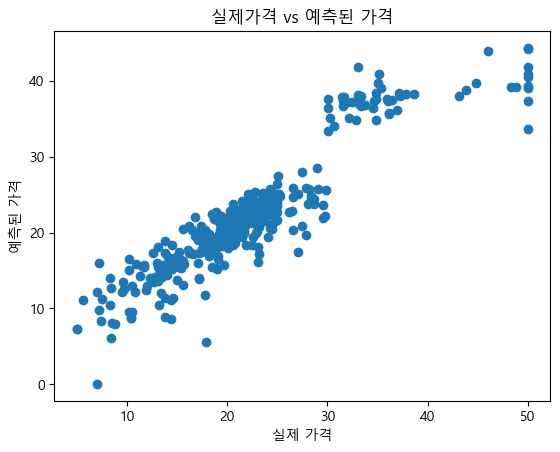

In [21]:
#진짜 가격과 예측된 가격 비교
plt.scatter(y_train, y_pred)
plt.xlabel('실제 가격')
plt.ylabel('예측된 가격')
plt.title('실제가격 vs 예측된 가격')
plt.show()

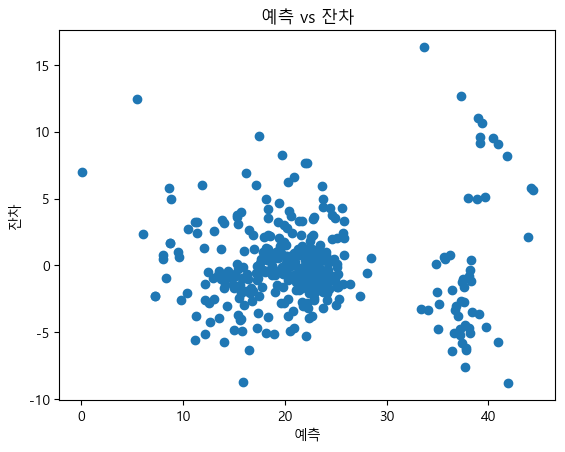

In [22]:
# 잔차 확인하기
# *잔차: 표본집단에서 회귀식을 얻었다면, 그 회귀식을 통해 얻은 예측값과 실제 관측값의 차이가 잔차

plt.scatter(y_pred, y_train-y_pred)
plt.title('예측 vs 잔차')
plt.xlabel('예측')
plt.ylabel('잔차')
plt.show()

# 이 플롯에서는 어떠한 패턴도 보이지 않으며 값들이 0 주변에서 동등하게 분포되어 있다. 
# 따라서 선형성 가정이 만족되었다.
# *선형성 가정: 귀 분석에서 주로 사용되는 개념으로, 독립 변수와 종속 변수 사이에 선형 관계가 있다는 가정을 의미

C:\Users\KDT103\AppData\Local\Temp\ipykernel_23368\847857921.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_pred)


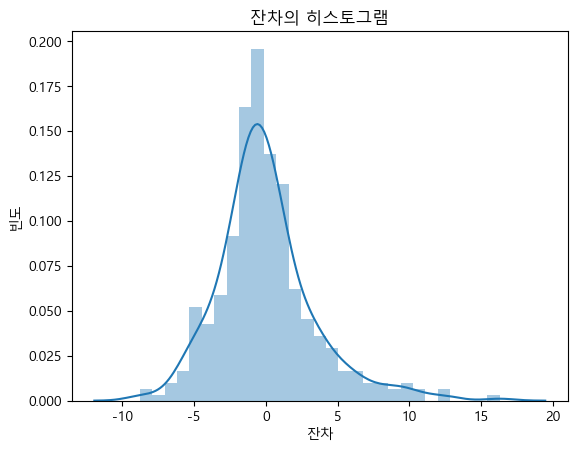

In [23]:
# 오차의 정규성 검사
# *정규성 검사: 통계적 분석에서 오차항이 정규 분포를 따르는지 여부를 확인하는 과정을 의미

sns.distplot(y_train - y_pred)
plt.title('잔차의 히스토그램')
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.show()

# 여기서 잔차는 정규분포를 따른다. -> 정규성 가정이 만족된다.

In [24]:
# 데이터 테스트하기
y_test_pred = lm.predict(X_test)

In [25]:
# 모델 평가
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('조정된 R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8302778807316977
조정된 R^2: 0.8129340145290975
MAE: 3.1292869419307188
MSE: 17.722395961825896
RMSE: 4.20979761530479
